In [ ]:
#!git clone https://github.com/rosasalberto/mil.git
!pip install mil
!pip install numpy
!pip install scikit-learn
!pip install scipy
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

import random
import pandas as pd
import numpy as np
import os
import cv2

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore') 


2022-11-07 03:36:23.174604: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 03:36:24.095976: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 03:36:25.773390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib:/opt/amazon/openmpi/lib:/usr/local/cuda/efa/lib:/usr/local/cuda/lib:/usr/local/cuda:/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/targets/x86_64-linux/lib:/usr/local

In [ ]:
FOLDER_NAME = 'ScoreTiler_128_200_10'

In [ ]:
x_train1 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train1.npz', allow_pickle=True)

x_train2 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train2.npz', allow_pickle=True)

x_train3 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train3.npz', allow_pickle=True)
x_train4 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train4.npz', allow_pickle=True)
x_train5 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train5.npz', allow_pickle=True)
x_train6 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train6.npz', allow_pickle=True)
x_train7 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train7.npz', allow_pickle=True)
x_train7 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train7.npz', allow_pickle=True)
x_train8 = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_train8.npz', allow_pickle=True)



In [ ]:
y_train = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_y_train.npz', allow_pickle=True) 

y_valid= np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_y_valid.npz', allow_pickle=True)
x_valid = np.load(fr'/home/ubuntu/MIL/{FOLDER_NAME}/breast_bags_{FOLDER_NAME}_x_valid.npz', allow_pickle=True)


In [ ]:
#len(x_train1),len(x_train2)#,len(x_train3),len(x_train4),len(x_train5),len(x_train6),len(x_train7),len(y_train),len(x_valid),len(y_valid)

In [ ]:
len(y_train['y']) # 800개

800

In [ ]:
len(x_valid['x']) # 200개

200

In [ ]:
len(y_valid['y']) # 200개

200

In [ ]:
x1 = x_train1['x']
print(len(x1),type(x1))
del x_train1

100 <class 'numpy.ndarray'>


In [ ]:
x2 = x_train2['x']
print(len(x2),type(x2))
del x_train2

100 <class 'numpy.ndarray'>


In [ ]:
x3 = x_train3['x']
print(len(x3),type(x3))
del x_train3

100 <class 'numpy.ndarray'>


In [ ]:
x4 = x_train4['x']
print(len(x4),type(x4))
del x_train4

100 <class 'numpy.ndarray'>


In [ ]:
x5 = x_train5['x']
print(len(x5),type(x5))
del x_train5

100 <class 'numpy.ndarray'>


In [ ]:
x6 = x_train6['x']
print(len(x6),type(x6))
del x_train6

100 <class 'numpy.ndarray'>


In [ ]:
x7 = x_train7['x']
print(len(x7),type(x7))
del x_train7

100 <class 'numpy.ndarray'>


In [ ]:
x8 = x_train8['x']
print(len(x8),type(x8))
del x_train8

100 <class 'numpy.ndarray'>


In [ ]:
bags_train = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8), axis=0)
del x1,x2,x3,x4,x5,x6,x7,x8

In [ ]:
len(bags_train),type(bags_train)

(800, numpy.ndarray)

In [ ]:
y_train = y_train['y'] # 800개
len(y_train),type(y_train)

(800, numpy.ndarray)

In [ ]:
x_valid = x_valid['x'] # 200개
len(x_valid),type(x_valid)

(200, numpy.ndarray)

In [ ]:
bags_test = x_valid
print(len(bags_test),type(bags_test))
del x_valid

200 <class 'numpy.ndarray'>


In [ ]:
y_test = y_valid['y'] # 200개
print(len(y_test),type(y_test))
del y_valid

200 <class 'numpy.ndarray'>


In [ ]:
print(len(bags_train),type(bags_train))
print(len(y_train),type(y_train))
print(len(bags_test),type(bags_test))
print(len(y_test),type(y_test))

800 <class 'numpy.ndarray'>
800 <class 'numpy.ndarray'>
200 <class 'numpy.ndarray'>
200 <class 'numpy.ndarray'>


In [ ]:
# maximum  number of instances in the training set
max_len_train = np.max([len(bag) for bag in bags_train])
max_len_test = np.max([len(bag) for bag in bags_test])

max_ = np.max([max_len_train, max_len_test])
max_

200

In [ ]:
bags_train_1D =[np.array(bag).reshape(-1, 128*128) for bag in bags_train]
bags_test_1D =[np.array(bag).reshape(-1, 128*128) for bag in bags_test]

In [ ]:
len(bags_train_1D)

800

# Train DeepAttentionMIL

In [ ]:
from mil.metrics import AUC, BinaryAccuracy
from mil.validators import KFold
from mil.trainer.trainer import Trainer
from mil.models import SVC
from mil.bag_representation.mapping import DiscriminativeMapping
from mil.preprocessing import StandarizerBagsList, NormalizeBagsImage

from mil.models.bag_level.deep_attention import AttentionDeepPoolingMil
from mil.utils.utils import get_samples_weight
from mil.utils.padding import Padding

In [ ]:
trainer = Trainer()

metrics = [AUC, BinaryAccuracy]
model = AttentionDeepPoolingMil(gated=False, threshold=0.4)
pipeline = [('padding', Padding(max_len=max_))]

trainer.prepare(model, preprocess_pipeline=pipeline ,metrics=metrics)

2022-11-07 03:39:12.271837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 03:39:12.400069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 03:39:12.400283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 03:39:12.402634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
valid = KFold(n_splits=2, shuffle=True)

history = trainer.fit(bags_train_1D[:], y_train[:], validation_strategy=valid, sample_weights='balanced',verbose=1, model__epochs=100, model__batch_size=1, model__verbose=0)

: 

: 

In [ ]:
print(np.mean([e['binaryaccuracy'] for e in history['metrics_val']]))
print(np.mean([e['auc'] for e in history['metrics_val']]))
history['metrics_val']

0.528
0.5


[{'auc': 0.5, 'binaryaccuracy': 0.5}, {'auc': 0.5, 'binaryaccuracy': 0.556}]

In [ ]:
trainer.predict_metrics(bags_test_1D, y_test)

7/7 [==============================] - 1s 112ms/step


{'auc': 0.5, 'binaryaccuracy': 0.475}

In [ ]:
# positive instances with more than 0.4 in attention weight
pos = trainer.get_positive_instances(bags_test_1D)

7/7 [==============================] - 2s 192ms/step


In [ ]:
# getting the attention weights for each bag
_, att = trainer.model.model(trainer.pipeline[:-1].transform(bags_test_1D))
att = att.numpy().reshape([len(bags_test_1D), -1])

# getting the prediction of the bag
y_pred = trainer.predict(bags_test_1D)
y_pred = y_pred.reshape([len(bags_test_1D), -1])
y_pred = np.where(y_pred >= 0.5, 1, 0).reshape(-1)

7/7 [==============================] - 1s 165ms/step


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
"""model.save(r'C:\A\breastCancer\mil\output/model_AttentionDeepPoolingMil_1.h5')

import pickle
with open(r'C:\A\breastCancer\mil\output/history_AttentionDeepPoolingMil_1.pickle','wb') as g:
    pickle.dump(history,g,pickle.HIGHEST_PROTOCOL)"""

### Ploting attention weights

In [ ]:
import matplotlib.pyplot as plt

def add_subplot_border(ax, width=4, color=None):
    fig = ax.get_figure()
    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)

def plot_bag(bag, label_bag, label_prediction, label_instance, attention, threshold, digit):
    fig, ax = plt.subplots(1,len(bag),figsize=(20,2.5))
    for i in range(len(bag)):
        #plotting images
        ax[i].axis('off')
        if label_instance[i] in digit and label_bag == 1:
            img_plot = ax[i].imshow(np.abs(bag[i]*255-255), cmap='gray', vmin=0, vmax=255)
        else:
            img_plot = ax[i].imshow(bag[i]*255, cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(str(label_instance[i]))
        ax[i].text(0.5,-0.15, str(round(attention[i], 3)), size=12, ha="center", 
         transform=ax[i].transAxes)
        
        # contour selected image
        if attention[i] > threshold and label_prediction==1:
            add_subplot_border(ax[i], color='r')
        
    
    fig.suptitle("Bag label: {}, Bag prediction: {}".format(label_bag, label_prediction))
    plt.show()

In [ ]:
for i in range(10):
    plot_bag(bags_test[i], y_test[i], y_pred[i], test_ins[i], att[i], threshold=0.5, digit=[7])

NameError: name 'test_ins' is not defined

In [ ]:
true_label = []
for pos_ins in pos:
    true_label.append(test_ins[pos_ins[0]][pos_ins[1]])
y_pred = np.array(true_label)

# detected as positive instances
print(np.unique(y_pred, return_counts=True))

(array([0, 2, 3, 7, 8, 9], dtype=uint8), array([ 1,  2,  1, 64,  2,  2], dtype=int64))


# Train APR

In [ ]:
from mil.models import APR

In [ ]:
trainer = Trainer()

metrics = [AUC, BinaryAccuracy]
model = APR(thres=0.1, epsilon=0.38, step=200, verbose=0)
pipeline = []

trainer.prepare(model, preprocess_pipeline=pipeline ,metrics=metrics)

In [ ]:
valid = KFold(n_splits=2, shuffle=True)

history = trainer.fit(bags_train_1D[:100], y_train[:100], validation_strategy=valid, verbose=1)

In [ ]:
print(np.mean([e['binaryaccuracy'] for e in history['metrics_val']]))
history['metrics_val']

0.5575


[{'auc': 0.4965278, 'binaryaccuracy': 0.55},
 {'auc': 0.5203993, 'binaryaccuracy': 0.565}]

In [ ]:
model.save(r'C:\A\breastCancer\mil\output/model_APR_1.h5')

import pickle
with open(r'C:\A\breastCancer\mil\output/history_APR_1.pickle','wb') as g:
    pickle.dump(history,g,pickle.HIGHEST_PROTOCOL)

### Plotting the most discriminative features

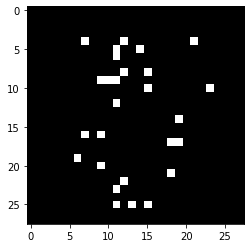

In [ ]:
# most discriminative features
disc_features = trainer.model.rel_features_

test_im = np.zeros(shape=(28*28,))
test_im[disc_features] = 255
test_im = test_im.reshape(28,28)

plt.imshow(test_im, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
trainer.predict_metrics(bags_test_1D, y_test)

{'auc': 0.5714286, 'binaryaccuracy': 0.64}

In [ ]:
# predicting positive instances
pos = trainer.get_positive_instances(bags_test_1D)

true_label = []
for pos_ins in pos:
    true_label.append(test_ins[pos_ins[0]][pos_ins[1]])
y_pred = np.array(true_label)

# detected as positive instances
print(np.unique(y_pred, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 1, 74,  1,  2,  6, 10,  2,  7,  8,  3], dtype=int64))


# Train MILES mapping

In [ ]:
from mil.bag_representation.mapping import MILESMapping

In [ ]:
trainer = Trainer()

metrics = [AUC, BinaryAccuracy]
model = SVC(kernel='linear', C=1, class_weight='balanced')
pipeline = [('disc_mapping', MILESMapping())]

trainer.prepare(model, preprocess_pipeline=pipeline ,metrics=metrics)

In [ ]:
valid = KFold(n_splits=2, shuffle=True)

history = trainer.fit(bags_train_1D, y_train, validation_strategy=valid, verbose=1)

MemoryError: Unable to allocate 10.6 GiB for an array with shape (86631, 16384) and data type float64

In [ ]:
print(np.mean([e['binaryaccuracy'] for e in history['metrics_val']]))
history['metrics_val']

0.7575


[{'auc': 0.7439561, 'binaryaccuracy': 0.77},
 {'auc': 0.7005208, 'binaryaccuracy': 0.745}]

In [ ]:
model.save(r'C:\A\breastCancer\mil\output/model_MILEMapping_1.h5')

import pickle
with open(r'C:\A\breastCancer\mil\output/history_MILEMapping_1.pickle','wb') as f:
    pickle.dump(history,f,pickle.HIGHEST_PROTOCOL)